In [1]:
import os
csv_files = []
json_files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        if file_path.endswith('.csv'):
            csv_files.append(file_path)
        elif file_path.endswith('.json'):
            json_files.append(file_path)

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
# sort filenames (alphabetically) to maintain right file order of both file formats
sorted_csv = sorted(csv_files)
sorted_json = sorted(json_files)

In [3]:
import pandas as pd

# read data and drop unused columns to save space
def read_data(csv_names, json_names):
    assert len(csv_names) == len(json_names)
    csvs, jsons = [], []
    for idx, _ in enumerate(csv_names):
        df = pd.read_csv(csv_names[idx], encoding='utf-8', encoding_errors='ignore', infer_datetime_format=True)
        df.drop(columns=['tags', 'thumbnail_link', 'description'], inplace=True)
        csvs.append(df)
        jsn = pd.read_json(json_names[idx])
        jsn.drop(columns=['kind','etag'], inplace=True)
        jsons.append(jsn)
    return csvs, jsons

In [4]:
from IPython.display import display
csvs, jsons = read_data(sorted_csv, sorted_json)
display(csvs[0].head())
csvs[0].dtypes # check data types to confirm if pandas inferred them correctly

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,17158579,787425,43420,125882,False,False,False
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,1014651,127794,1688,13030,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146035,5339,8181,False,False,False
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095828,132239,1989,17518,False,False,False
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,33523622,1634130,21082,85067,False,False,False


video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
dtype: object

observation: pandas has incorrectly inferred type of some columns e.g. date & date time type etc. so we might need to convert column values to our expected type

In [5]:
# convert columns to their correct type
def convert_data(csv_data):
    for idx, _ in enumerate(csv_data):
        csv_data[idx]['trending_date'] = pd.to_datetime(csv_data[idx]['trending_date'], format='%y.%d.%m', utc=True)
        csv_data[idx]['title'] = csv_data[idx]['title'].astype(str)
        csv_data[idx]['channel_title'] = csv_data[idx]['channel_title'].astype(str)
        csv_data[idx]['category_id'] = csv_data[idx]['category_id'].astype('int64')
        csv_data[idx]['publish_time'] = pd.to_datetime(csv_data[idx]['publish_time'])
        csv_data[idx]['views'] = csv_data[idx]['views'].astype('int64')
        csv_data[idx]['likes'] = csv_data[idx]['likes'].astype('int64')
        csv_data[idx]['dislikes'] = csv_data[idx]['dislikes'].astype('int64')
        csv_data[idx]['comment_count'] = csv_data[idx]['comment_count'].astype('int64')
        csv_data[idx]['comments_disabled'] = csv_data[idx]['comments_disabled'].astype(bool)
        csv_data[idx]['ratings_disabled'] = csv_data[idx]['ratings_disabled'].astype(bool)
        csv_data[idx]['video_error_or_removed'] = csv_data[idx]['video_error_or_removed'].astype(bool)
    return csv_data

In [6]:
converted_csvs = convert_data(csvs)
display(converted_csvs[0].head())
converted_csvs[0].dtypes

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,n1WpP7iowLc,2017-11-14 00:00:00+00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,17158579,787425,43420,125882,False,False,False
1,0dBIkQ4Mz1M,2017-11-14 00:00:00+00:00,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,1014651,127794,1688,13030,False,False,False
2,5qpjK5DgCt4,2017-11-14 00:00:00+00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146035,5339,8181,False,False,False
3,d380meD0W0M,2017-11-14 00:00:00+00:00,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095828,132239,1989,17518,False,False,False
4,2Vv-BfVoq4g,2017-11-14 00:00:00+00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,33523622,1634130,21082,85067,False,False,False


video_id                               object
trending_date             datetime64[ns, UTC]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
dtype: object

In [7]:
display(jsons[0].head())
display(jsons[0].dtypes)
print('\n{}'.format(jsons[0].values[0])) # prints first row of first dataframe constructed from json

,items
0,"{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,"{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,"{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,"{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,"{'kind': 'youtube#videoCategory', 'etag': '""ld..."


items    object
dtype: object


[{'kind': 'youtube#videoCategory', 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}]


observation: dataframes read from json files are in unusable form and contain many unused data so we need to extract useful data fields from them

In [8]:
# extract id, category name and convert them to their expected type
def extract_json(json_data):
    cleaned = []
    for idx, _ in enumerate(json_data):
        df = pd.DataFrame([dict(item[0]) for item in json_data[idx].values])
        df['category_name'] = df['snippet'].apply(lambda snp: dict(snp).get('title', 'Unknown'))
        df = df[['id', 'category_name']]
        df.drop_duplicates(inplace=True)
        df['id'] = df['id'].astype('int64')
        df['category_name'] = df['category_name'].astype(str)
        cleaned.append(df.set_index('id'))
    return cleaned

In [9]:
extracted_jsons = extract_json(jsons)
extracted_jsons[0].head()

,category_name
id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [10]:
# join csvs and their corresponding json by category_id
def join_by_category(csv_data, json_data):
    joined = []
    for idx, _ in enumerate(csv_data):
        df = csv_data[idx].join(json_data[idx], on='category_id') # left join
        df['category_name'] = df['category_name'].fillna('NA') # fill category names for categories that are not found in json
        joined.append(df)
    return joined

In [11]:
joined_data = join_by_category(converted_csvs, extracted_jsons)
first_five_cat = extracted_jsons[0].head(5)['category_name'].values

# to verify if joins are performed correctly
joined_data[0][joined_data[0]['category_name'].isin(first_five_cat)].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,n1WpP7iowLc,2017-11-14 00:00:00+00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,17158579,787425,43420,125882,False,False,False,Music
4,2Vv-BfVoq4g,2017-11-14 00:00:00+00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,33523622,1634130,21082,85067,False,False,False,Music
10,H1KBHFXm2Bg,2017-11-14 00:00:00+00:00,21 Savage - Bank Account (Official Music Video),21 Savage,10,2017-11-10 19:00:02+00:00,5068229,263596,8585,28976,False,False,False,Music
12,FyZMnhUtLfE,2017-11-14 00:00:00+00:00,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,2017-11-12 16:00:01+00:00,158815,218,30,186,False,False,False,Film & Animation
13,7MxiQ4v0EnE,2017-11-14 00:00:00+00:00,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11 16:41:15+00:00,5718766,127477,7134,8063,False,False,False,Music


In [12]:
# combine dataframes of different countries
def combine(joined, filenames):
    assert len(joined) == len(filenames)
    df = pd.DataFrame()
    for idx, _ in enumerate(filenames):
        country = filenames[idx].split('/')[-1].split('_')[0]
        joined[idx]['country'] = country
        df = pd.concat([df,joined[idx]], axis=0)
    return df

In [13]:
combined = combine(joined_data, sorted_json)
display(combined.head())
combined.dtypes

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country
0,n1WpP7iowLc,2017-11-14 00:00:00+00:00,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,17158579,787425,43420,125882,False,False,False,Music,CA
1,0dBIkQ4Mz1M,2017-11-14 00:00:00+00:00,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,1014651,127794,1688,13030,False,False,False,Comedy,CA
2,5qpjK5DgCt4,2017-11-14 00:00:00+00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,3191434,146035,5339,8181,False,False,False,Comedy,CA
3,d380meD0W0M,2017-11-14 00:00:00+00:00,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,2095828,132239,1989,17518,False,False,False,Entertainment,CA
4,2Vv-BfVoq4g,2017-11-14 00:00:00+00:00,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,33523622,1634130,21082,85067,False,False,False,Music,CA


video_id                               object
trending_date             datetime64[ns, UTC]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
category_name                          object
country                                object
dtype: object

In [14]:
combined.isna().sum() # confirm that we have no empty values

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
category_name             0
country                   0
dtype: int64

In [15]:
row_dup_count = combined.groupby(list(combined.columns), as_index=False).size()
row_dup_count = row_dup_count[row_dup_count['size'] > 1].sort_values('size')
row_dup_count.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country,size
87522,ESGu10M49Zo,2018-05-19 00:00:00+00:00,【ももクロMV】『クローバーとダイヤモンド』Music Video,Momoiro Clover Z Channel,10,2018-05-17 14:59:03+00:00,338718,11321,493,1522,False,False,False,Music,JP,4
8862,0aH2JyPKkcQ,2018-02-07 00:00:00+00:00,2018年 全日本ラリー選手権 第１戦 嬬恋・群馬,JRCAVideo,2,2018-02-06 00:46:12+00:00,12637,288,3,21,False,False,False,Autos & Vehicles,JP,4
94919,Fmx-IEa83JU,2018-02-08 00:00:00+00:00,2018-2-7-01【仮想通貨の投資方法は５つある】視聴者様から家庭用ビデオカメラが届きま...,【コンサルユーチューバー】「法令遵守」「セキュリティ」「ICO資金調達」経営コンサルタント・...,29,2018-02-07 07:49:10+00:00,7757,123,26,24,False,False,False,NA,JP,4
27693,3th7Jp3HnfQ,2018-03-15 00:00:00+00:00,【Minecraft】凍える世界...キュレム降臨！ゆくポケ日記44ページ【ゆっくり実況】【...,せぶーん/dgsseven,20,2018-03-14 08:08:49+00:00,22245,131,19,151,False,False,False,Gaming,JP,4
261056,i-t9kW8mECE,2018-03-15 00:00:00+00:00,高画質になったデッドバイデイライト生存者の生放送 #104【Dead by Daylight】,柚子木しろ,20,2018-03-14 18:36:45+00:00,20278,231,37,22,False,False,False,Gaming,JP,4


observation: there are some rows which have up to 4 copies, so we need to remove the duplicates for correct analysis results

In [16]:
dropped = combined.drop_duplicates()
dropped[dropped.duplicated(keep=False)] # to verify that there are no duplicates

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country


In [17]:
g_col = ['country', 'trending_date', 'video_id']
agg_col = ['title']

vid_title_cnt = dropped.groupby(g_col)[agg_col].count()
error_count = vid_title_cnt[vid_title_cnt.title > 1].sort_values(agg_col)
display(error_count.tail())
display(dropped[(dropped.video_id == '#NAME?') & (dropped.trending_date == '2018-03-08') & (dropped.country == 'MX')].head())

title
country trending_date             video_id       
JP      2018-03-21 00:00:00+00:00 #NAME?        8
        2018-04-02 00:00:00+00:00 #NAME?        8
MX      2018-03-08 00:00:00+00:00 #NAME?        9
        2018-03-15 00:00:00+00:00 #NAME?        9
        2018-04-26 00:00:00+00:00 #NAME?       10

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country
22342,#NAME?,2018-03-08 00:00:00+00:00,Atrapando Infiêles. Episodio 4. Los encontró e...,Badabun,24,2018-03-07 22:10:03+00:00,880665,49290,2053,6366,False,False,False,Entertainment,MX
22355,#NAME?,2018-03-08 00:00:00+00:00,Pokémex 6 (Si Pokémon Fuera Mexicano) | SKETCH...,QueParió!,23,2018-03-07 05:24:36+00:00,304074,37781,495,2749,False,False,False,Comedy,MX
22395,#NAME?,2018-03-08 00:00:00+00:00,Niños Maltratados👫👶😭 | Caso Cerrado | Telemundo,Caso Cerrado,24,2018-03-08 00:00:01+00:00,58965,885,78,97,False,False,False,Entertainment,MX
22407,#NAME?,2018-03-08 00:00:00+00:00,"3 Familias, avance del capítulo 96 | TV Azteca",Azteca Novelas,24,2018-03-08 03:04:19+00:00,14366,161,3,12,False,False,False,Entertainment,MX
22409,#NAME?,2018-03-08 00:00:00+00:00,Enemigo Intimo Capitulo 10 HD 2/5,Novelas Now,22,2018-03-08 00:10:30+00:00,36474,167,7,3,False,False,False,People & Blogs,MX


observation: #NAME? is id of multiple videos, we might need more information that does #NAME? means unavailable video id as it seems unlikely for different videos to have same id

In [18]:
g_col = ['channel_title', 'title', 'publish_time', 'trending_date', 'country']
dup_cnt = dropped.groupby(g_col, as_index=False).size().sort_values('size')
dup_cnt = dup_cnt[dup_cnt['size'] > 1]
display(dup_cnt.tail())

sample = dup_cnt.loc[dup_cnt.index[0]]
dropped[(dropped['channel_title'] == sample[0]) & (dropped['title'] == sample[1]) & (dropped['publish_time'] == sample[2]) & (dropped['trending_date'] == sample[3]) & (dropped['country'] == sample[4])]

,channel_title,title,publish_time,trending_date,country,size
295880,ibighit,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,2018-05-06 15:00:02+00:00,2018-05-07 00:00:00+00:00,JP,2
360013,퀴즈 코리아,실제 FBI 기출문제 - FBI 관찰력 테스트에 지금 도전해 보세요!!,2018-01-18 07:00:01+00:00,2018-01-19 00:00:00+00:00,KR,2
339094,一番面白い瞬間爆笑!,乃木坂46 《46時間TV》 朝まで乃木坂人狼＃1 2018 03 25,2018-03-25 01:22:54+00:00,2018-03-26 00:00:00+00:00,JP,2
207922,SAB TV,Your Favorite Character | Tapu Sena's Day At T...,2018-06-06 11:31:59+00:00,2018-06-07 00:00:00+00:00,IN,2
171897,NHK,【NHK】【ノーカット実況なし】羽生結弦 ショートプログラム＜ピョンチャン＞,2018-02-16 05:51:49+00:00,2018-02-17 00:00:00+00:00,JP,2


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country
32160,xrs6-RgAQ-8,2018-05-17 00:00:00+00:00,Dice Media | Adulting | Web Series | S01E05 - ...,Dice Media,24,2018-05-16 09:31:10+00:00,1074927,43295,1598,4551,False,False,False,Entertainment,IN
32290,xrs6-RgAQ-8,2018-05-17 00:00:00+00:00,Dice Media | Adulting | Web Series | S01E05 - ...,Dice Media,24,2018-05-16 09:31:10+00:00,1074927,43297,1598,4551,False,False,False,Entertainment,IN


observation: for some videos, there are both old and updated data thus we need to clean them before analysis

In [19]:
always_inc = ['views']
sort = dropped.sort_values(g_col + always_inc)

display(sort[sort.duplicated(subset=g_col, keep=False)].head()) # show first 5 duplicated videos

display(sort[(sort['video_id'] == 'F3_j5bdh57E') & (sort['trending_date'] =='2018-01-19')]) # before
dropped_view = sort.drop_duplicates(subset=g_col, keep='last').reset_index(drop=True) # try to keep video with most updated info
# after
display(dropped_view[(dropped_view['video_id'] == 'F3_j5bdh57E') & (dropped_view['trending_date'] =='2018-01-19')])


dup_count = dropped_view.groupby(g_col, as_index=False).size()
dup_count[dup_count['size'] > 1].sort_values('size').tail() # verify that there are no duplicate videos

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country
10878,F3_j5bdh57E,2018-01-19 00:00:00+00:00,셀럽파이브 패러디 일본 여고생 댄스팀 tdc 동영상,! 세상에 무슨일이,25,2018-01-17 19:36:29+00:00,286241,1095,73,334,False,False,False,News & Politics,KR
11019,F3_j5bdh57E,2018-01-19 00:00:00+00:00,셀럽파이브 패러디 일본 여고생 댄스팀 tdc 동영상,! 세상에 무슨일이,25,2018-01-17 19:36:29+00:00,286241,1094,73,334,False,False,False,News & Politics,KR
10886,F4qfN5UeFvQ,2018-01-19 00:00:00+00:00,[MV] SUNMI (선미) _ Heroine (주인공),1theK (원더케이),10,2018-01-18 09:00:00+00:00,2827100,242377,3770,14970,False,False,False,Music,KR
11027,F4qfN5UeFvQ,2018-01-19 00:00:00+00:00,[MV] SUNMI (선미) _ Heroine (주인공),1theK (원더케이),10,2018-01-18 09:00:00+00:00,2827100,242378,3770,14970,False,False,False,Music,KR
3199,#NAME?,2017-12-02 00:00:00+00:00,Ep 37.문과 1등 이과 1등 담배 피우는 뒤에서 1등을 발견하다~!!!,1등 미디어,23,2017-12-01 07:30:00+00:00,310394,5855,104,2070,False,False,False,Comedy,KR


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country
10878,F3_j5bdh57E,2018-01-19 00:00:00+00:00,셀럽파이브 패러디 일본 여고생 댄스팀 tdc 동영상,! 세상에 무슨일이,25,2018-01-17 19:36:29+00:00,286241,1095,73,334,False,False,False,News & Politics,KR
11019,F3_j5bdh57E,2018-01-19 00:00:00+00:00,셀럽파이브 패러디 일본 여고생 댄스팀 tdc 동영상,! 세상에 무슨일이,25,2018-01-17 19:36:29+00:00,286241,1094,73,334,False,False,False,News & Politics,KR


,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name,country
1,F3_j5bdh57E,2018-01-19 00:00:00+00:00,셀럽파이브 패러디 일본 여고생 댄스팀 tdc 동영상,! 세상에 무슨일이,25,2018-01-17 19:36:29+00:00,286241,1094,73,334,False,False,False,News & Politics,KR


,channel_title,title,publish_time,trending_date,country,size


NOTE: here we assumed that for same video, record that come later after sorting ascendingly by views is the most updated one. to be more sure we might need data telling when the record was created/updated

In [20]:
cat_like = dropped_view.groupby(['category_name'])[['likes', 'dislikes']].agg('sum').reset_index()
cat_like['like_ratio'] = cat_like['likes'] / cat_like['dislikes']
cat_like.head()

,category_name,likes,dislikes,like_ratio
0,Autos & Vehicles,45292999,2560952,17.686001
1,Comedy,1040062338,38875726,26.753515
2,Education,116375929,3680317,31.621170
3,Entertainment,2743599798,241816174,11.345808
4,Film & Animation,569327727,24186494,23.539076


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

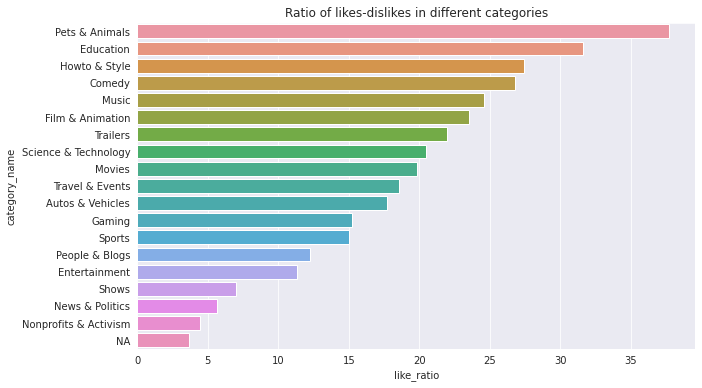

In [22]:
plt.figure(figsize=(10,6))
plt.title('Ratio of likes-dislikes in different categories')
sns.barplot(y='category_name', x='like_ratio', data=cat_like.sort_values('like_ratio', ascending=False))
plt.show()

observation: according to the data, audience more prefer videos from categories that give them positive emotions, new knowledge or entertainment than unprefering. in contrast, more dislikes are given to videos related to society and politics compared to likes

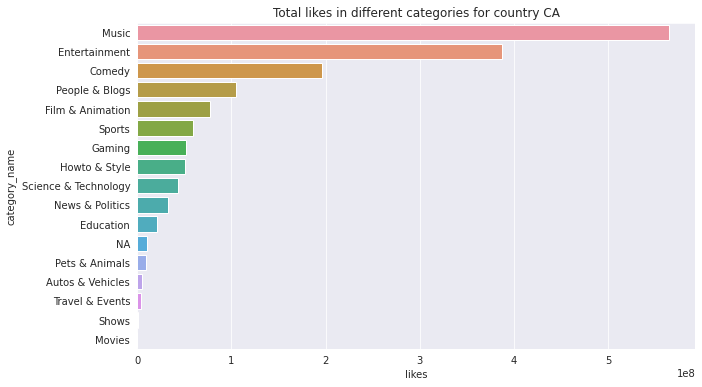

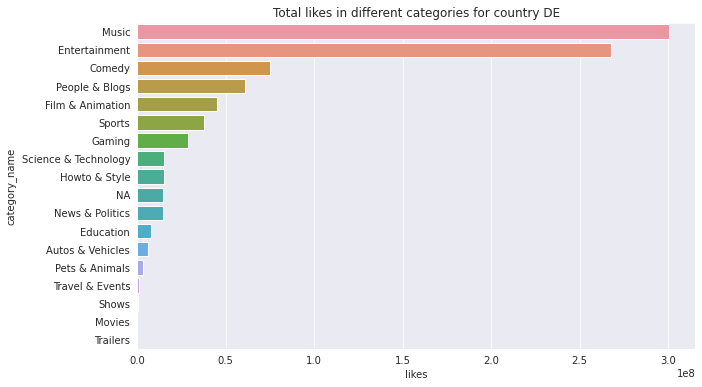

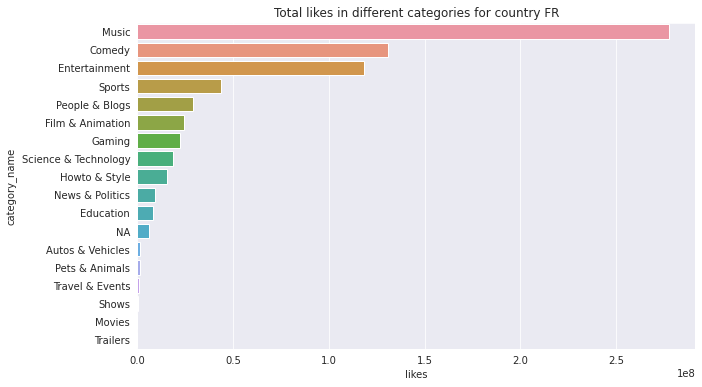

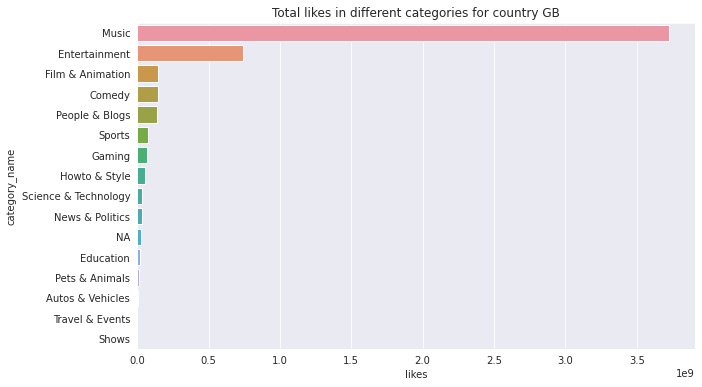

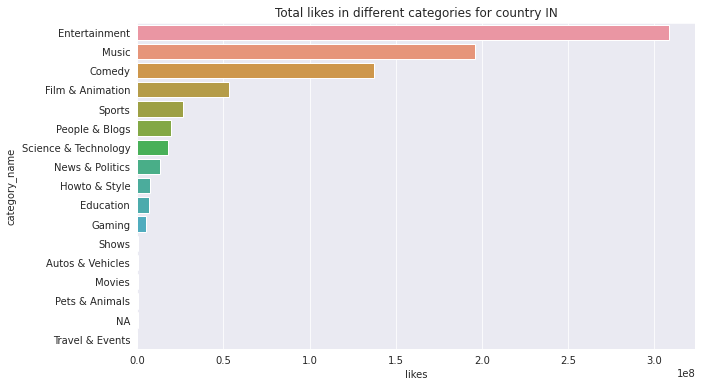

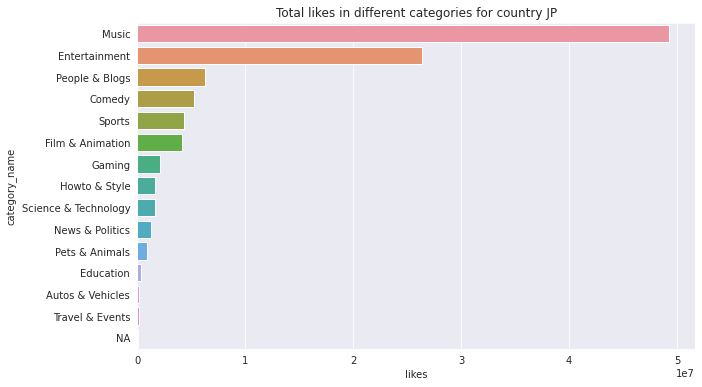

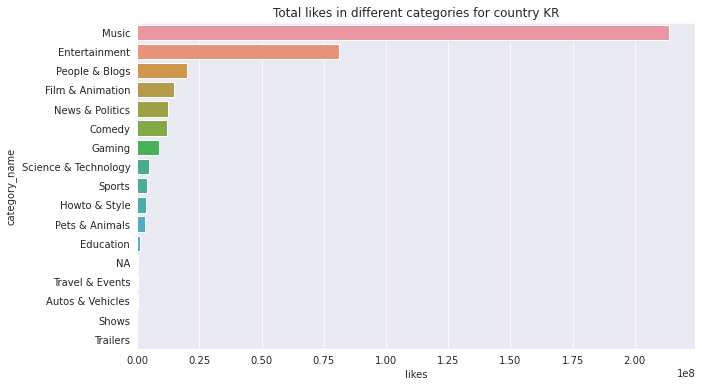

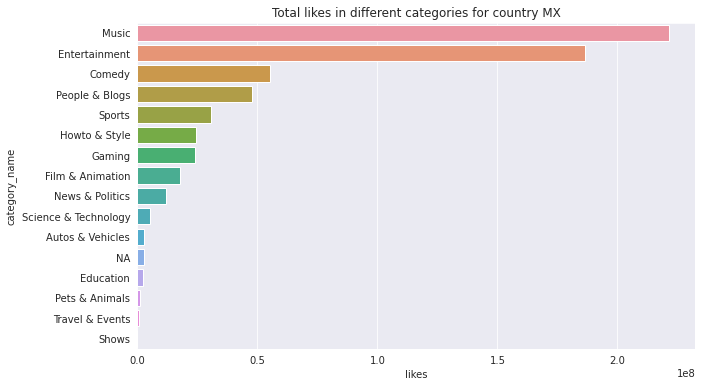

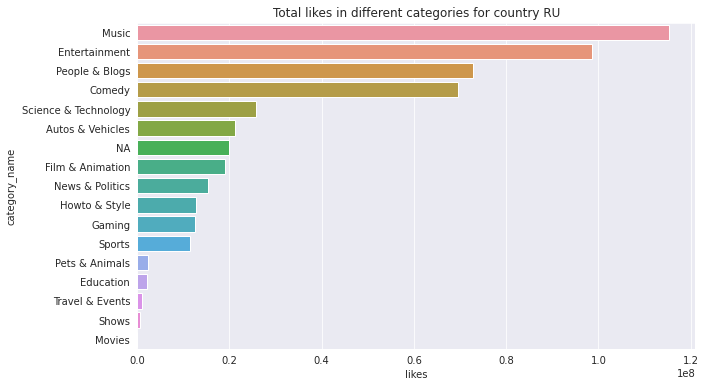

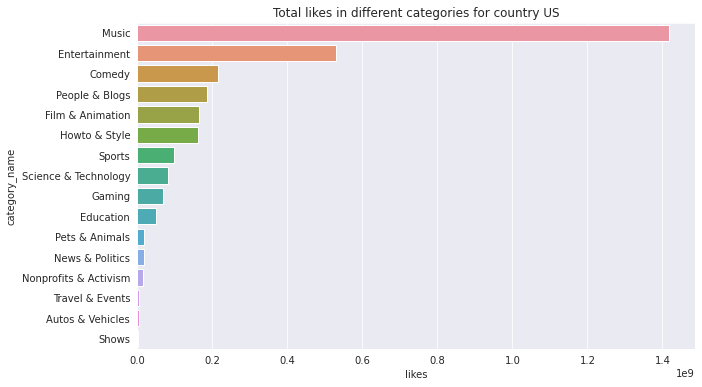

In [23]:
cat_cnt = dropped_view.groupby(['country', 'category_name'])[['likes', 'views']].agg('sum').reset_index()

for cnt in cat_cnt['country'].unique():
    plt.figure(figsize=(10,6))
    plt.title('Total likes in different categories for country {}'.format(cnt))
    sns.barplot(y='category_name', x='likes', data=cat_cnt[cat_cnt['country'] == cnt].sort_values('likes', ascending=False))
    plt.show()

observation: videos that belong to music, entertainment and comedy categories are most prefered by more than half of the countries. whereas people in Japan, Korea and Russia prefer videos of category people and blogs more than comedy

In [24]:
g_col = ['country','title', 'channel_title', 'publish_time']
trending_date_count = dropped_view.groupby(g_col, as_index=False)[['trending_date']].nunique()
top5_trending = trending_date_count.groupby(['country'], as_index=False).apply(lambda group: group.sort_values(['trending_date'], ascending=False).head(5))
top5_trending.columns = g_col + ['trending_date_count']
for cnt in top5_trending['country'].unique():
    display(top5_trending[top5_trending['country'] == cnt])

country                                              title  \
0 12598      CA  Marvel Studios' Avengers: Infinity War Officia...   
  7222       CA  G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...   
  14725      CA               Post Malone - rockstar ft. 21 Savage   
  4174       CA  Childish Gambino - This Is America (Official V...   
  6909       CA  Fergie Performs The U.S. National Anthem / 201...   

                channel_title              publish_time  trending_date_count  
0 12598  Marvel Entertainment 2017-11-29 13:26:24+00:00                    8  
  7222         GEazyMusicVEVO 2017-12-19 20:00:05+00:00                    8  
  14725        PostMaloneVEVO 2017-11-22 05:00:01+00:00                    8  
  4174    ChildishGambinoVEVO 2018-05-06 04:00:07+00:00                    8  
  6909         MLG Highlights 2018-02-19 01:37:11+00:00                    7

country                                              title  \
1 48811      DE              Was diese Ex-Serienstars HEUTE machen   
  48086      DE                      VENOM - Official Trailer (HD)   
  29330      DE  Calvin Harris, Dua Lipa - One Kiss (Official V...   
  37944      DE  Jodie Foster and Jennifer Lawrence Present the...   
  29198      DE     CAPITAL BRA - BERLIN LEBT (PROD.BY THE CRATEZ)   

                       channel_title              publish_time  \
1 48811                  Wissenswert 2018-03-07 16:30:01+00:00   
  48086  Sony Pictures Entertainment 2018-04-24 03:45:03+00:00   
  29330             CalvinHarrisVEVO 2018-05-02 23:01:00+00:00   
  37944       ABC Television Network 2018-03-05 05:06:28+00:00   
  29198                    TEAM KUKU 2018-06-08 13:12:29+00:00   

         trending_date_count  
1 48811                    7  
  48086                    5  
  29330                    5  
  37944                    5  
  29198                    5

country                                              title  \
2 71534      FR  Maître Gims - Loup Garou ft. Sofiane (Clip Off...   
  76343      FR  Saad Lamjarred - Ghazali (EXCLUSIVE Music Vide...   
  73239      FR       Orelsan - San / Victoires de la Musique 2018   
  71866      FR               Molière de l'humour : Blanche Gardin   
  68774      FR                      Le M - Gotham (Clip Officiel)   

                       channel_title              publish_time  \
2 71534                  Maître GIMS 2018-03-08 21:50:49+00:00   
  76343   Saad Lamjarred | سعد لمجرد 2018-03-09 20:07:01+00:00   
  73239  Les Victoires de la Musique 2018-02-09 23:44:25+00:00   
  71866           France Télévisions 2018-05-28 22:15:42+00:00   
  68774                  LeMOfficiel 2018-02-09 16:57:07+00:00   

         trending_date_count  
2 71534                    6  
  76343                    5  
  73239                    5  
  71866                    5  
  68774                    5

country                                              title  \
3 88157      GB                                    To Our Daughter   
  86768      GB  Jurassic World: Fallen Kingdom - Official Trai...   
  86787      GB  Justin Timberlake’s FULL Pepsi Super Bowl LII ...   
  86590      GB                Incredibles 2 - Olympics Sneak Peek   
  86669      GB  Janelle Monáe – Make Me Feel [Official Music V...   

              channel_title              publish_time  trending_date_count  
3 88157        Kylie Jenner 2018-02-04 20:27:38+00:00                   38  
  86768  Universal Pictures 2018-02-04 23:28:16+00:00                   38  
  86787                 NFL 2018-02-05 01:51:53+00:00                   38  
  86590        Disney•Pixar 2018-02-15 03:34:44+00:00                   37  
  86669       Janelle Monáe 2018-02-22 17:00:06+00:00                   37

country                                              title  \
4 90599       IN                         BB Ki Vines- | Maun Vrat |   
  98698       IN  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
  100225      IN  The Vision of Bharat | Mahesh Babu | Siva Kora...   
  93193       IN  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   
  98699       IN  Sanju | Official Trailer | Ranbir Kapoor | Raj...   

               channel_title              publish_time  trending_date_count  
4 90599          BB Ki Vines 2018-03-05 13:09:25+00:00                    9  
  98698         FoxStarHindi 2018-04-24 07:58:08+00:00                    9  
  100225  DVV Entertainments 2018-03-06 12:32:50+00:00                    8  
  93193          Rhythm Boyz 2018-05-31 13:30:04+00:00                    8  
  98699         FoxStarHindi 2018-05-30 07:51:32+00:00                    8

country                                   title channel_title  \
5 107026      JP                 IPPONグランプリ TKO 木下 最速の一本    K.P.N. M.Y   
  117439      JP                         米津玄師  MV「Lemon」          米津玄師   
  117357      JP      稲村亜美触った人RT！ 2018年3月10日【中学生・野球・始球式】        チャンネルC   
  109095      JP  【DHC】3/12月 ケント・ギルバート×上念司×居島一平【虎ノ門ニュース】        DHCテレビ   
  110463      JP                  【公式】サンドウィッチマン　コント【写真館】  grapecompany   

                      publish_time  trending_date_count  
5 107026 2018-03-10 12:49:40+00:00                    4  
  117439 2018-02-26 23:00:04+00:00                    3  
  117357 2018-03-10 23:07:22+00:00                    3  
  109095 2018-03-12 01:28:27+00:00                    3  
  110463 2018-04-15 15:02:15+00:00                    3

country                                              title  \
6 127275      KR       나얼 (Naul) - 기억의 빈자리 (Emptiness in Memory) MV   
  121777      KR                             TWICE Heart Shaker M/V   
  134636      KR                                    현재 논란중인 홍대 머리채남   
  118603      KR  '500억 수표' 들고 나타난 노인, 은행원도 처음 보는 고액 수표... 조회결과 ...   
  123812      KR                               [병맛더빙] 급식생 3 X 콜롬비아나   

                channel_title              publish_time  trending_date_count  
6 127275  CJENMMUSIC Official 2017-11-29 09:00:00+00:00                    7  
  121777     jypentertainment 2017-12-11 08:59:59+00:00                    7  
  134636                 궁금타파 2017-11-12 18:52:16+00:00                    7  
  118603                 뉴스지금 2018-01-24 06:57:34+00:00                    7  
  123812                  장삐쭈 2017-11-30 09:23:26+00:00                    7

country                                              title  \
7 154354      MX              Maluma - El Préstamo (Official Video)   
  156175      MX  Natti Natasha ❌  Bad Bunny - Amantes de Una No...   
  154511      MX              Maroon 5 - Girls Like You ft. Cardi B   
  144140      MX                  EN VIVO AMERICA VS LEON  / ENLACE   
  144165      MX                  EN VIVO: Previo - América Vs León   

         channel_title              publish_time  trending_date_count  
7 154354    MalumaVEVO 2018-03-09 11:00:01+00:00                    5  
  156175  Pina Records 2018-01-11 21:01:26+00:00                    4  
  154511   Maroon5VEVO 2018-05-31 04:00:00+00:00                    4  
  144140       LA NETA 2018-03-11 00:50:03+00:00                    4  
  144165  Club América 2018-03-11 03:42:23+00:00                    4

country                                              title  \
8 174882      RU                 VERSUS #9 (сезон IV): Guf VS Птаха   
  180149      RU  Голая баба со скакалкой! Такого чумового номер...   
  172716      RU                           GAZLIVE | Тина Канделаки   
  197890      RU  Столото представляет | Русское лото тираж №122...   
  187038      RU   МИТИНГ В ПОДДЕРЖКУ ГРУДИНИНА В МОСКВЕ 10.03.2018   

               channel_title              publish_time  trending_date_count  
8 174882      versusbattleru 2018-02-18 21:29:22+00:00                    4  
  180149  чебурашка это мышь 2018-03-10 15:00:03+00:00                    4  
  172716        ТО Gazgolder 2018-05-31 13:01:29+00:00                    4  
  197890             Столото 2018-03-11 03:42:50+00:00                    4  
  187038          Антиплатон 2018-03-10 15:45:59+00:00                    4

country                                              title  \
9 208722      US        Sam Smith - Pray (Official Video) ft. Logic   
  209943      US         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!   
  209521      US               The ULTIMATE $30,000 Gaming PC Setup   
  210399      US  YoungBoy Never Broke Again Goes Sneaker Shoppi...   
  208793      US           Selena Gomez - Back To You (Lyric Video)   

              channel_title              publish_time  trending_date_count  
9 208722  SamSmithWorldVEVO 2018-05-09 17:00:00+00:00                   29  
  209943   Lucas and Marcus 2018-05-13 18:03:56+00:00                   29  
  209521      Unbox Therapy 2018-05-13 19:00:25+00:00                   28  
  210399            Complex 2018-05-14 14:00:03+00:00                   28  
  208793       Selena Gomez 2018-05-10 16:00:11+00:00                   28

In [25]:
g_col = ['country','title', 'channel_title', 'publish_time']
most_liked = dropped_view.groupby(g_col, as_index=False)[['likes']].last()
top5_liked = most_liked.groupby(['country'], as_index=False).apply(lambda group: group.sort_values(['likes'], ascending=False).head(5))
for cnt in top5_liked['country'].unique():
    display(top5_liked[top5_liked['country'] == cnt])

country                                              title  \
0 2705       CA                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  4174       CA  Childish Gambino - This Is America (Official V...   
  21955      CA  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  12598      CA  Marvel Studios' Avengers: Infinity War Officia...   
  2709       CA  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   

                channel_title              publish_time    likes  
0 2705                ibighit 2018-05-18 09:00:02+00:00  5053338  
  4174    ChildishGambinoVEVO 2018-05-06 04:00:07+00:00  3037318  
  21955     YouTube Spotlight 2017-12-06 17:58:51+00:00  3014479  
  12598  Marvel Entertainment 2017-11-29 13:26:24+00:00  2606665  
  2709                ibighit 2017-11-24 09:00:02+00:00  2542863

country                                              title  \
1 27920      DE                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  49945      DE  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  40537      DE  Marvel Studios' Avengers: Infinity War Officia...   
  29592      DE  Childish Gambino - This Is America (Official V...   
  27924      DE  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   

                channel_title              publish_time    likes  
1 27920               ibighit 2018-05-18 09:00:02+00:00  4924056  
  49945     YouTube Spotlight 2017-12-06 17:58:51+00:00  2811217  
  40537  Marvel Entertainment 2017-11-29 13:26:24+00:00  2513103  
  29592   ChildishGambinoVEVO 2018-05-06 04:00:07+00:00  2478908  
  27924               ibighit 2017-11-24 09:00:02+00:00  2454901

country                                              title  \
2 57586      FR                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  80161      FR  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  80819      FR                         j-hope 'Daydream (백일몽)' MV   
  57590      FR  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
  57596      FR  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...   

             channel_title              publish_time    likes  
2 57586            ibighit 2018-05-18 09:00:02+00:00  4750254  
  80161  YouTube Spotlight 2017-12-06 17:58:51+00:00  2656682  
  80819            ibighit 2018-03-01 15:00:02+00:00  2392595  
  57590            ibighit 2017-11-24 09:00:02+00:00  2320652  
  57596            ibighit 2018-05-06 15:00:02+00:00  2285431

country                                              title  \
3 85552      GB                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  85838      GB  Childish Gambino - This Is America (Official V...   
  86060      GB                                 Drake - God’s Plan   
  85573      GB               Bad Bunny - Amorfoda | Video Oficial   
  85477      GB               Ariana Grande - No Tears Left To Cry   

               channel_title              publish_time    likes  
3 85552              ibighit 2018-05-18 09:00:02+00:00  5613827  
  85838  ChildishGambinoVEVO 2018-05-06 04:00:07+00:00  5444541  
  86060            DrakeVEVO 2018-02-17 05:00:01+00:00  4737873  
  85573            Bad Bunny 2018-02-15 00:00:03+00:00  3823879  
  85477     ArianaGrandeVevo 2018-04-20 04:00:03+00:00  3394437

country                                              title  \
4 101421      IN  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  95940       IN  Marvel Studios' Avengers: Infinity War Officia...   
  99960       IN     Taylor Swift - End Game ft. Ed Sheeran, Future   
  92619       IN        Ed Sheeran - Perfect (Official Music Video)   
  99959       IN                            Taylor Swift - Delicate   

                 channel_title              publish_time    likes  
4 101421     YouTube Spotlight 2017-12-06 17:58:51+00:00  2912710  
  95940   Marvel Entertainment 2017-11-29 13:26:24+00:00  2606663  
  99960        TaylorSwiftVEVO 2018-01-12 05:00:01+00:00  1804377  
  92619             Ed Sheeran 2017-11-09 11:04:14+00:00  1721384  
  99959        TaylorSwiftVEVO 2018-03-12 01:15:10+00:00  1658756

country                                              title  \
5 106377      JP                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  106385      JP  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...   
  108440      JP                         j-hope 'Daydream (백일몽)' MV   
  106376      JP  BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...   
  106378      JP  BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...   

         channel_title              publish_time    likes  
5 106377       ibighit 2018-05-18 09:00:02+00:00  4470923  
  106385       ibighit 2018-05-06 15:00:02+00:00  2285436  
  108440       ibighit 2018-03-01 15:00:02+00:00  2050596  
  106376       ibighit 2018-04-05 15:00:05+00:00  1573053  
  106378       ibighit 2018-06-01 15:00:01+00:00  1437903

country                                              title  \
6 120673      KR                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  122009      KR  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  120679      KR  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
  121478      KR  Marvel Studios' Avengers: Infinity War Officia...   
  120706      KR  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...   

                 channel_title              publish_time    likes  
6 120673               ibighit 2018-05-18 09:00:02+00:00  5150839  
  122009     YouTube Spotlight 2017-12-06 17:58:51+00:00  2811223  
  120679               ibighit 2017-11-24 09:00:02+00:00  2611254  
  121478  Marvel Entertainment 2017-11-29 13:26:24+00:00  2584675  
  120706               ibighit 2018-05-06 15:00:02+00:00  2533784

country                                              title  \
7 139358      MX                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  166072      MX  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  154565      MX  Marvel Studios' Avengers: Infinity War Officia...   
  139361      MX  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
  166462      MX                         j-hope 'Daydream (백일몽)' MV   

                 channel_title              publish_time    likes  
7 139358               ibighit 2018-05-18 09:00:02+00:00  4470923  
  166072     YouTube Spotlight 2017-12-06 17:58:51+00:00  2656698  
  154565  Marvel Entertainment 2017-11-29 13:26:24+00:00  2444976  
  139361               ibighit 2017-11-24 09:00:02+00:00  2320666  
  166462               ibighit 2018-03-01 15:00:02+00:00  2050610

country                                              title  \
8 171660      RU                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  171665      RU  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   
  171669      RU  BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...   
  175186      RU  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  171659      RU  BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...   

              channel_title              publish_time    likes  
8 171660            ibighit 2018-05-18 09:00:02+00:00  4470923  
  171665            ibighit 2017-11-24 09:00:02+00:00  2320662  
  171669            ibighit 2018-05-06 15:00:02+00:00  1956259  
  175186  YouTube Spotlight 2017-12-06 17:58:51+00:00  1891836  
  171659            ibighit 2018-04-05 15:00:05+00:00  1573046

country                                              title  \
9 204713      US                BTS (방탄소년단) 'FAKE LOVE' Official MV   
  205183      US  Childish Gambino - This Is America (Official V...   
  204624      US               Ariana Grande - No Tears Left To Cry   
  210390      US  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
  204716      US  BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...   

                channel_title              publish_time    likes  
9 204713              ibighit 2018-05-18 09:00:02+00:00  5613827  
  205183  ChildishGambinoVEVO 2018-05-06 04:00:07+00:00  5023450  
  204624     ArianaGrandeVevo 2018-04-20 04:00:03+00:00  3094021  
  210390    YouTube Spotlight 2017-12-06 17:58:51+00:00  3093544  
  204716              ibighit 2017-11-24 09:00:02+00:00  2729292

observation: for Canada, some of most trending videos are also most liked videos. for all countries in this dataset not including India, some videos by ibighit have been favored by audiences a lot

In [26]:
import numpy as np
g_col = ['country','title', 'channel_title', 'publish_time']
trending_col = ['trending_date']
trend_date = dropped_view[g_col + trending_col]
trend_date['days_to_trend'] = (trend_date['trending_date'].dt.date - trend_date['publish_time'].dt.date).dt.days
vid_time_trend = trend_date.groupby(g_col, as_index=False)[['days_to_trend']].max()
summ_df = pd.DataFrame()
for cnt in vid_time_trend.country.unique():
    data = vid_time_trend[vid_time_trend['country'] == cnt]
    summ = data.describe().T
    summ['country'] = cnt
    summ_df = pd.concat([summ_df,  summ])

summ_df.set_index('country', inplace=True)
display(summ_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
CA,24684.0,3.531924,56.223563,0.0,1.0,1.0,2.0,3658.0
DE,29805.0,1.945714,21.153344,0.0,1.0,1.0,2.0,2046.0
FR,30764.0,3.131810,51.063641,0.0,1.0,1.0,2.0,3190.0
GB,3392.0,47.344340,269.084433,0.0,8.0,13.0,20.0,3990.0
IN,16786.0,2.289229,2.187772,0.0,1.0,2.0,3.0,221.0
JP,13138.0,1.498706,7.941777,0.0,1.0,1.0,1.0,844.0
KR,16452.0,2.943350,26.261879,0.0,1.0,2.0,3.0,2337.0
MX,34125.0,1.970872,41.501291,0.0,1.0,1.0,1.0,2975.0
RU,34934.0,2.383838,29.580436,0.0,1.0,1.0,1.0,2416.0


observation: in majority of the countries considered, most of videos has taken at maximum 3 days to get trending after being published whilst in England and US half of the videos has taken one week or more to be trending

,country,title,channel_title,publish_time,days_trending
88275,GB,VENOM - Official Teaser Trailer (HD),Sony Pictures Entertainment,2018-02-08 14:00:04+00:00,37
87092,GB,Maroon 5 - Wait,Maroon5VEVO,2018-02-08 14:00:00+00:00,37
88157,GB,To Our Daughter,Kylie Jenner,2018-02-04 20:27:38+00:00,38
86787,GB,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,NFL,2018-02-05 01:51:53+00:00,38
86768,GB,Jurassic World: Fallen Kingdom - Official Trai...,Universal Pictures,2018-02-04 23:28:16+00:00,38


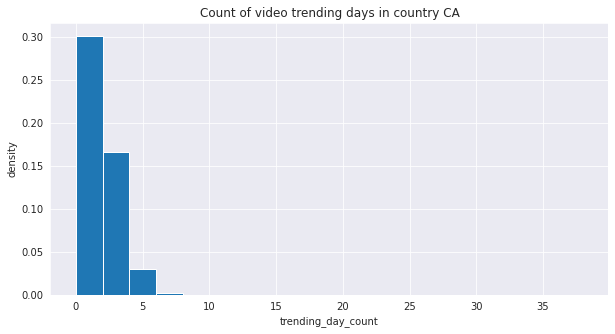

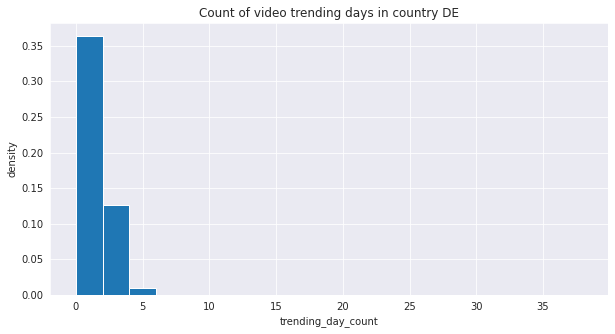

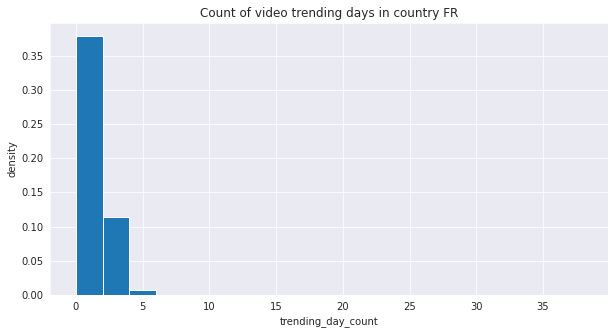

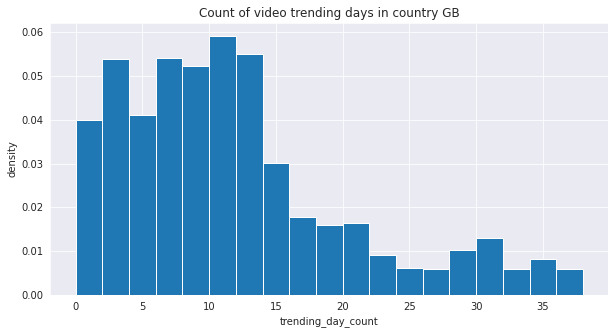

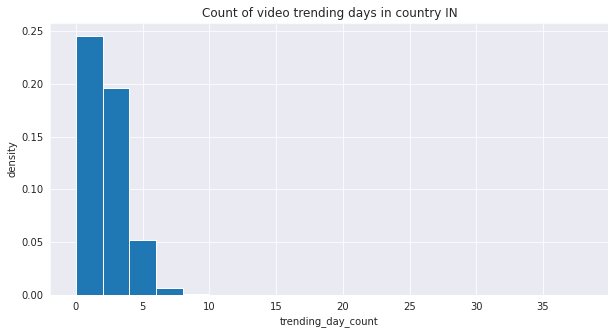

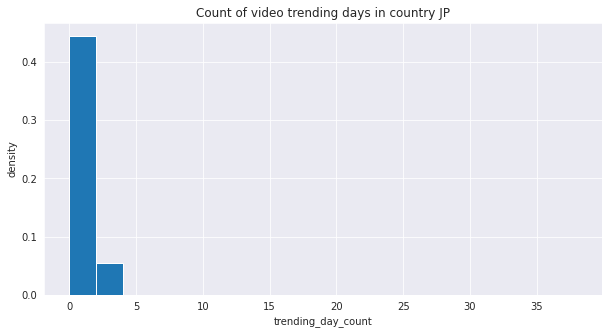

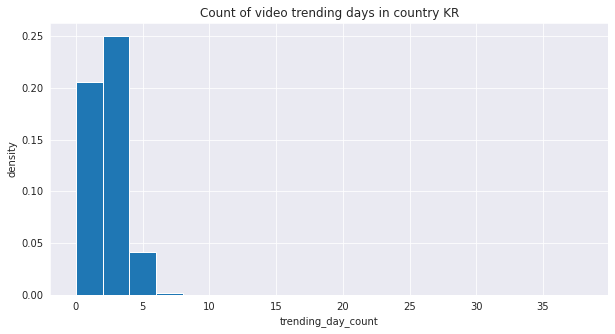

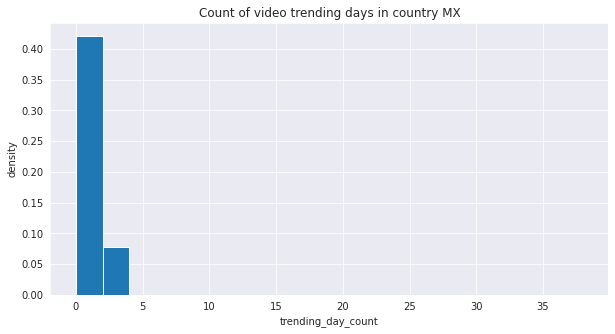

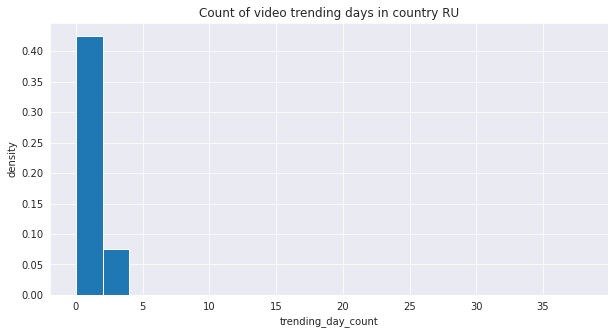

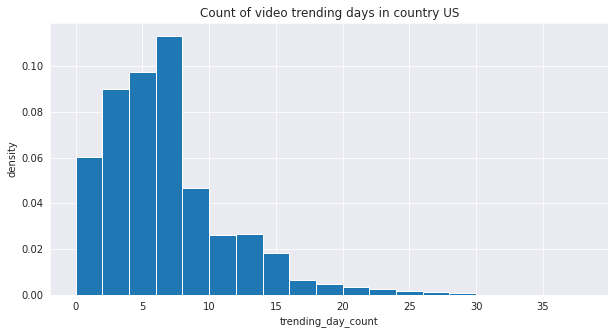

In [27]:
vid_trend_count = trend_date.groupby(g_col, as_index=False)[['trending_date']].nunique()
vid_trend_count.columns = g_col + ['days_trending']
display(vid_trend_count.sort_values('days_trending').tail())

for cnt in vid_trend_count.country.unique():
    data = vid_trend_count[vid_trend_count['country'] == cnt]
    plt.figure(figsize=(10,5))
    plt.title('Count of video trending days in country {}'.format(cnt))
    plt.hist(x='days_trending', data=data, density=True, bins=range(0, 40, 2))
    plt.xlabel('trending_day_count')
    plt.ylabel('density')
    plt.show()

observation: in all countries except UK and US, total days a video intrended hardly exceed seven. on the other hand, America and Britain have some videos become trending thirty to forty times in total

,country,title,channel_title,publish_time,trending_diff
204795,US,"Benedict Cumberbatch, Tom Hiddleston and Tom H...",Good Morning America,2018-04-09 14:23:23+00:00,24.0
206315,US,Helping the Police Find a Gun Underwater to So...,DALLMYD,2018-04-14 15:00:10+00:00,26.0
85481,GB,"Ariana Grande, Jimmy & The Roots Sing No Tears...",The Tonight Show Starring Jimmy Fallon,2018-05-15 03:44:48+00:00,26.0
86083,GB,"Dua Lipa - IDGAF ft. Charli XCX, Zara Larsson,...",BBC Radio 1,2018-02-21 08:00:03+00:00,31.0
86800,GB,KYLE - Ikuyo feat. 2 Chainz & Sophia Black [A...,SuperDuperKyle,2018-05-11 04:06:35+00:00,32.0


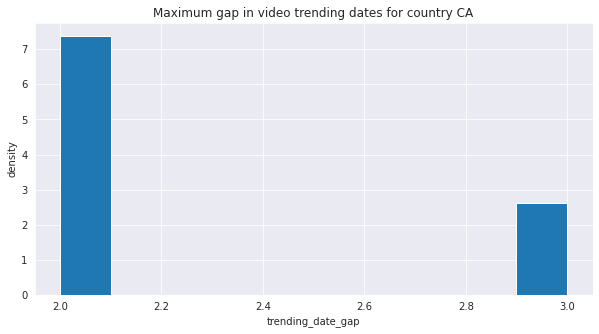

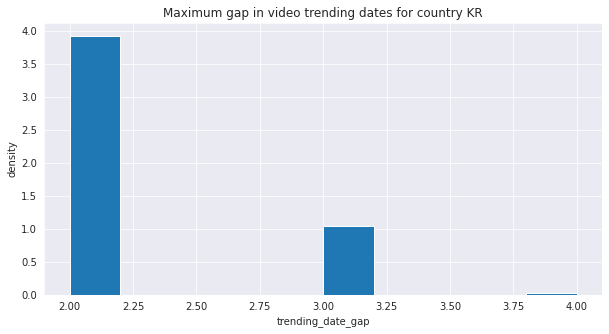

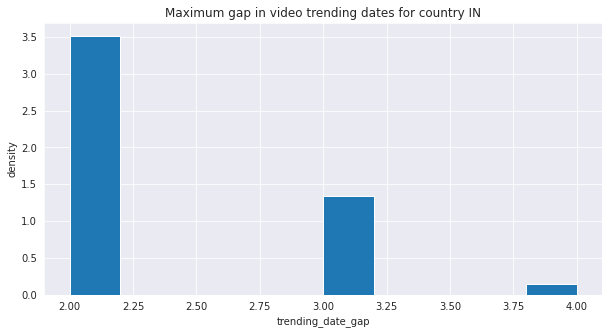

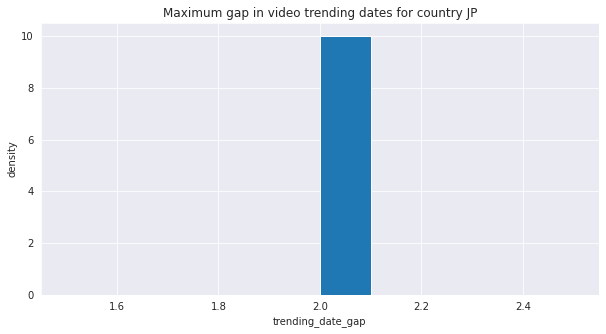

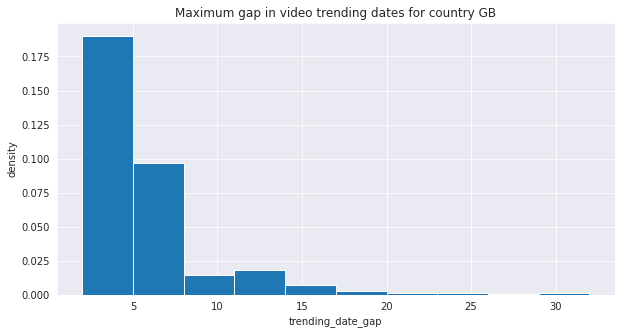

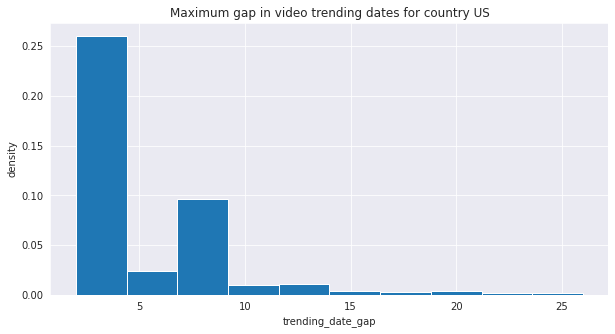

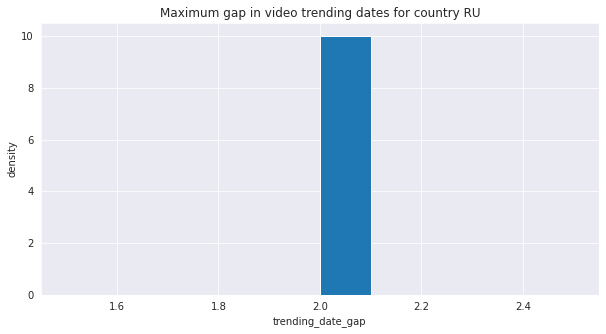

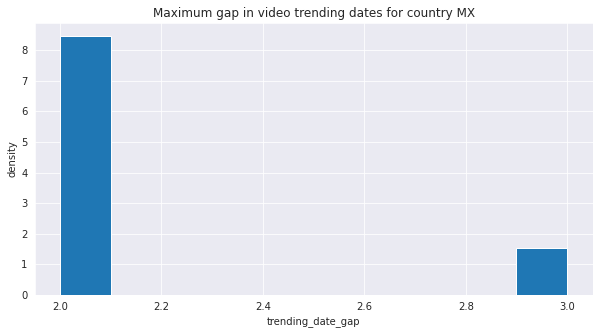

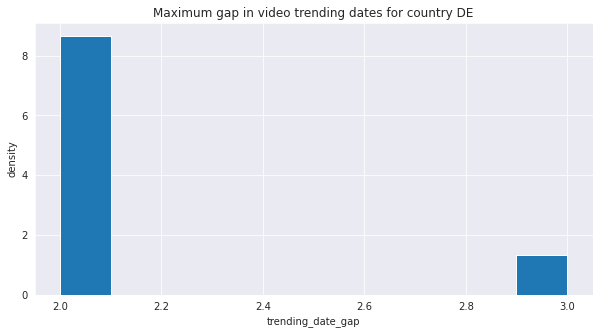

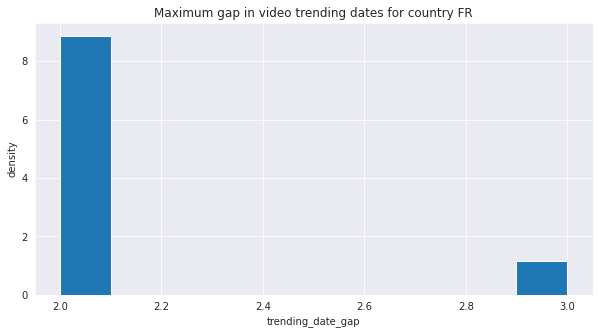

In [28]:
g_col = ['country','title', 'channel_title', 'publish_time']
agg_col = ['trending_date']
sort = dropped_view.sort_values(g_col + agg_col)
shift_down = sort.groupby(g_col)[agg_col].shift()
sort['trending_diff'] = ((sort['trending_date'] - shift_down['trending_date']).dt.days).fillna(0)
max_diff = sort.groupby(g_col, as_index=False)[['trending_diff']].max()
max_diff = max_diff[max_diff['trending_diff'] > 1].sort_values('trending_diff')

display(max_diff.tail())

for cnt in max_diff.country.unique():
    data = max_diff[max_diff['country'] == cnt]
    plt.figure(figsize=(10,5))
    plt.title('Maximum gap in video trending dates for country {}'.format(cnt))
    plt.hist(x='trending_diff', data=data, density=True)
    plt.xlabel('trending_date_gap')
    plt.ylabel('density')
    plt.show()

observation: for majority of countries, a video has taken less than a week to become popular again. nevertheless in USA and England, a video's trending dates can be as far as 3 weeks or more

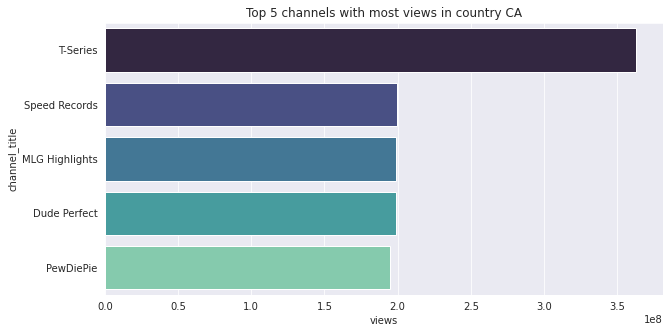

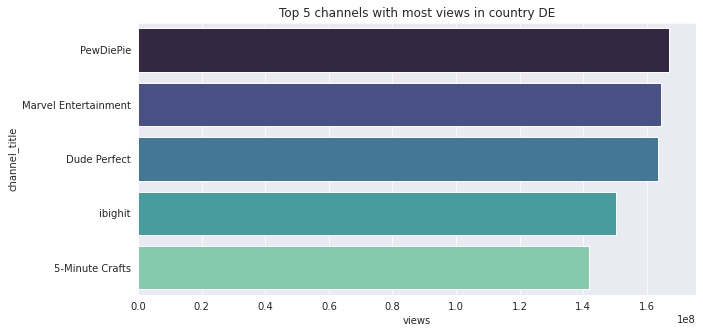

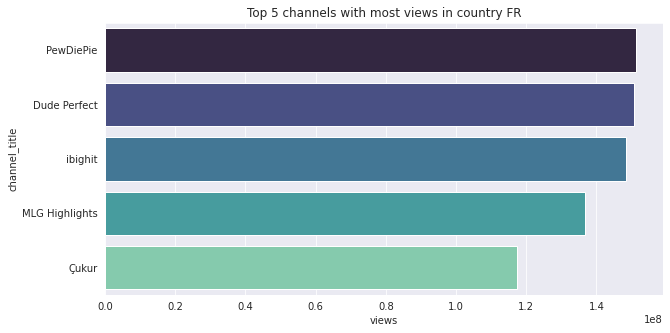

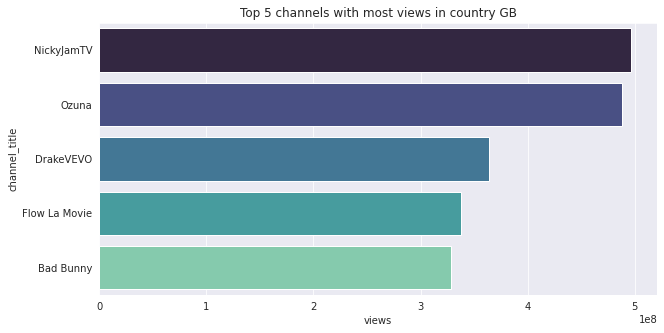

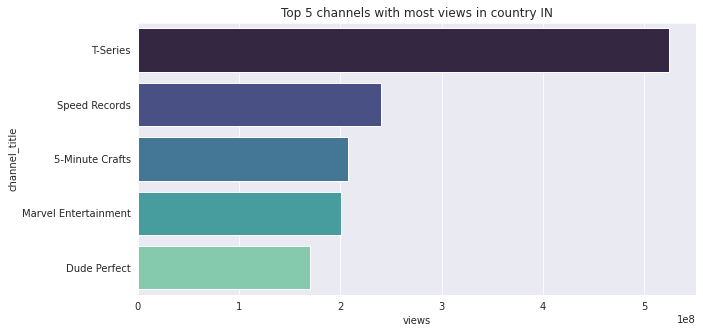

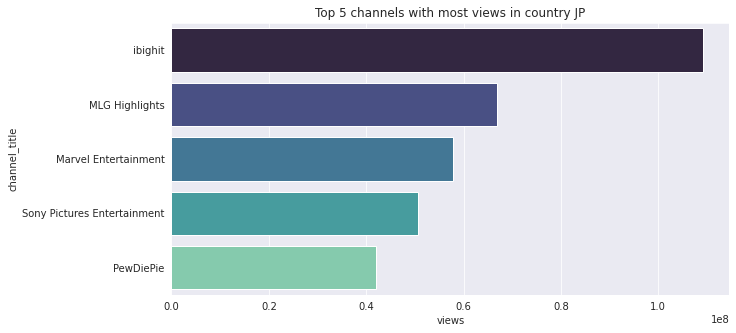

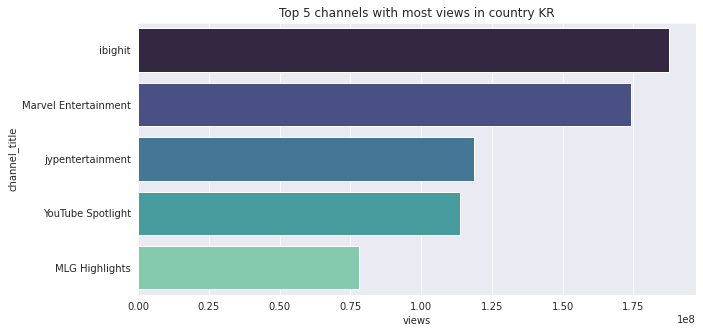

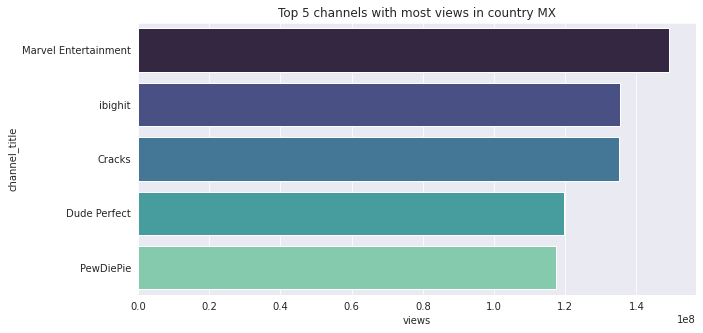

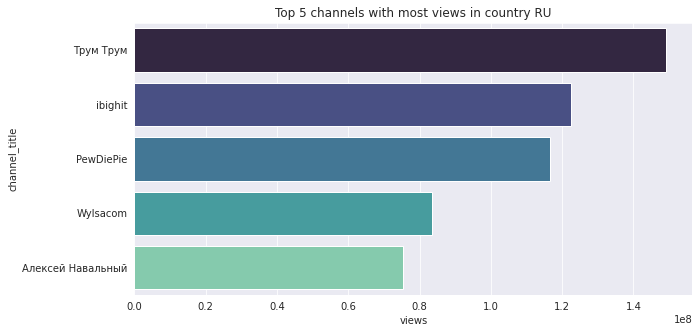

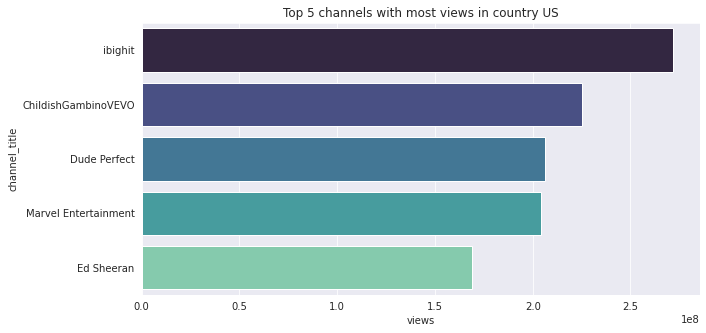

In [29]:
g_col = ['country','channel_title','title', 'publish_time', 'trending_date']
agg_col = ['views']

pop_channel = dropped_view.sort_values(g_col).groupby(g_col[:-1], as_index=False)[agg_col].last()
channel_total = pop_channel.groupby(g_col[0:2], as_index=False)[agg_col].sum()
country_top = channel_total.groupby('country', as_index=False).apply(lambda x: x.sort_values(['views', 'channel_title'], ascending=[False, True]).head(5))


for cnt in country_top.country.unique():
    data = country_top[country_top['country'] == cnt]
    plt.figure(figsize=(10,5))
    plt.title('Top 5 channels with most views in country {}'.format(cnt))
    sns.barplot(y='channel_title', x='views', data=data, palette='mako')
    plt.show()

observation: ibighit, PewDiePie and Dude Perfect are 3 high view channels found across more than half of the countries. surprisingly, Great Britain exhibit different pattern from other nations in terms of top five channels with most views

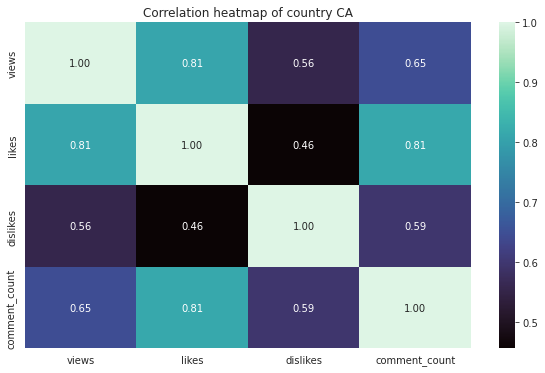

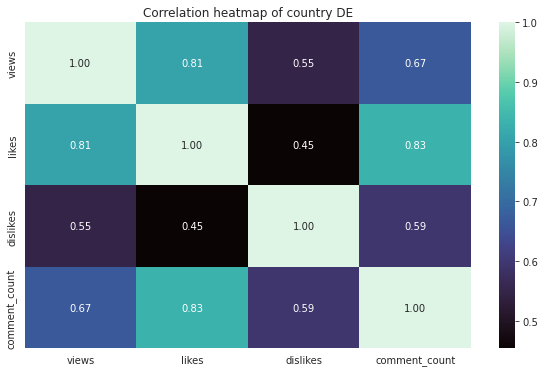

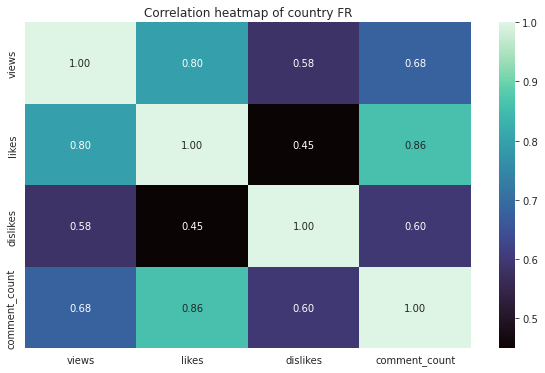

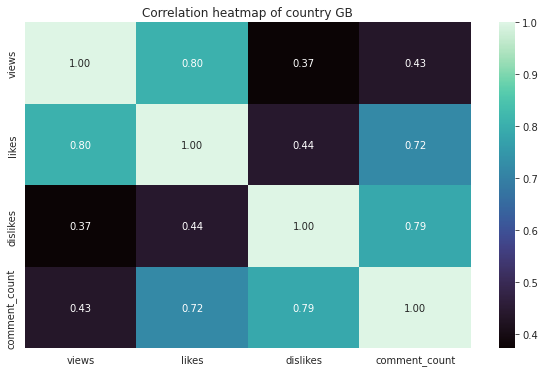

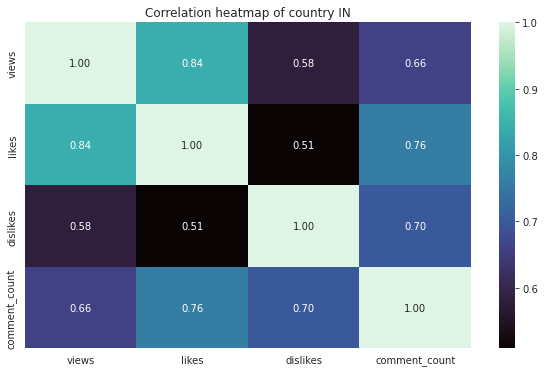

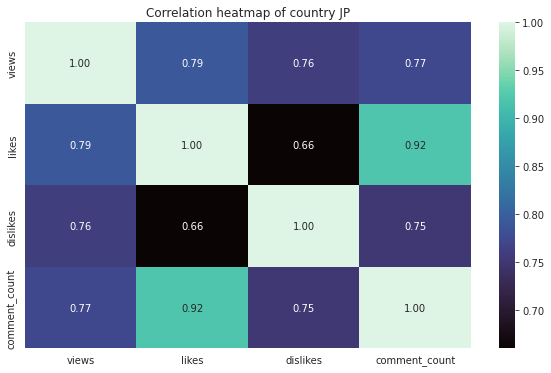

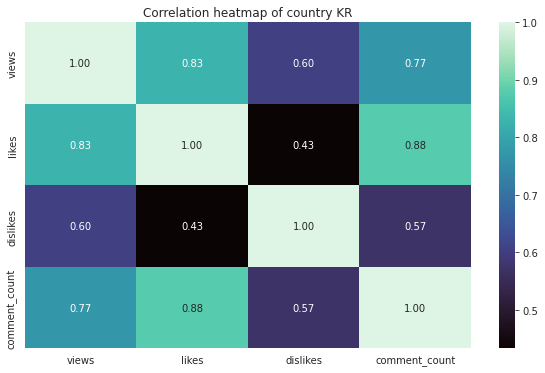

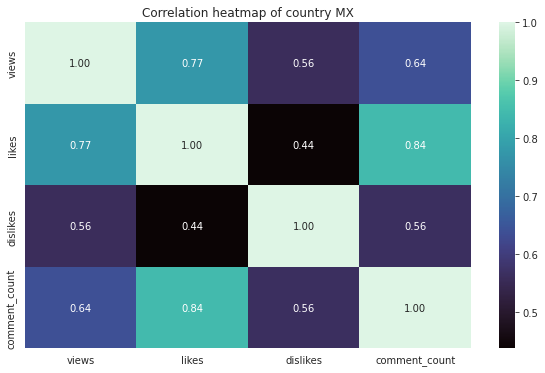

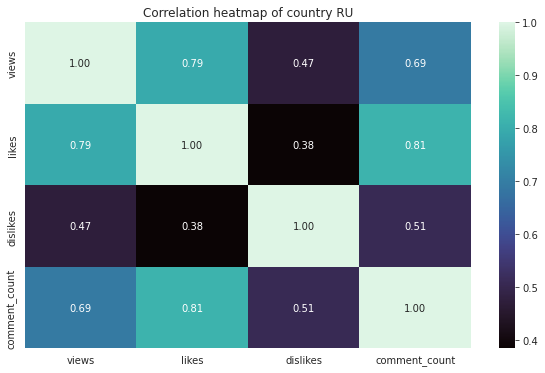

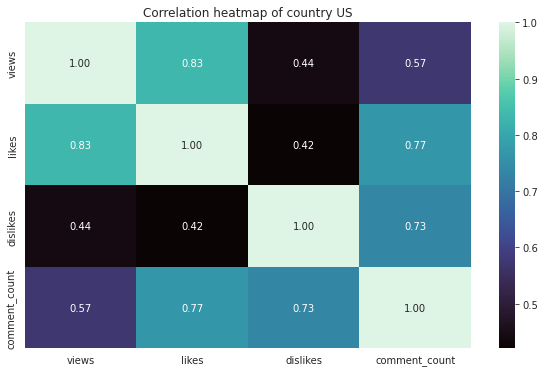

In [30]:
g_col = ['country','channel_title','title', 'publish_time', 'trending_date']
agg_col = ['views', 'likes', 'dislikes', 'comment_count']

num_data = dropped_view.sort_values(g_col).groupby(g_col[:-1], as_index=False)[agg_col].last()
for cnt in num_data.country.unique():
    data = num_data[num_data['country'] == cnt]
    plt.figure(figsize=(10,6))
    plt.title('Correlation heatmap of country {}'.format(cnt))
    sns.heatmap(data.iloc[:,-4:].corr(), cmap='mako', annot=True, fmt='.2f')
    plt.show()

observation: trending videos likes and dislikes are (positively) correlated in all countries considered. in overall for a video, getting high likes did not mean obtaining low dislikes and this could probably be due to the fact that some groups of audiences who have watched the video prefer different content. for UK, no. of comments have stronger tendency to increase with dislikes than likes as opposed to other countries.